In [1]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg

In [82]:
def giveRollingDiff(period):
    df=pd.read_csv("Data/NIFTY 50_Data.csv")
    df=df.iloc[::-1]
    df=df.reset_index()
    df=df.drop(["Open","Low","High","index"],axis=1)
    df['Rolling Close Df']= df['Close'].diff(periods=period)
    df["Date"]=pd.to_datetime(df["Date"])
    return df


# Gives the Dataframe with the rolling difference of given period


In [86]:
df

,Date,Close,Rolling Close Df
0,1990-07-03,279.02,NaN
1,1990-07-05,284.04,NaN
2,1990-07-06,289.04,NaN
3,1990-07-09,289.69,NaN
4,1990-07-10,288.69,NaN
...,...,...,...
7784,2022-08-05,17397.50,-501.15
7785,2022-08-08,17525.10,-239.70
7786,2022-08-10,17534.75,118.20
7787,2022-08-11,17659.00,155.65


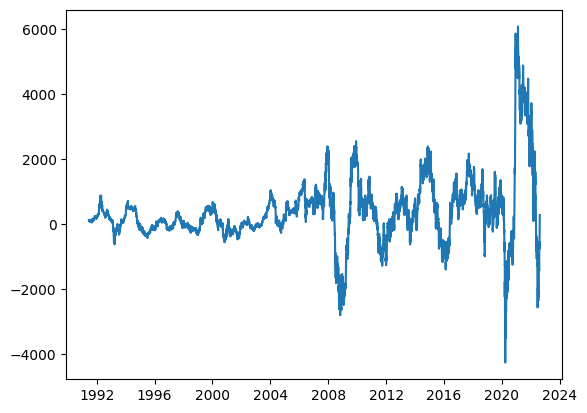

In [80]:
plt.plot(giveRollingDiff(180)["Date"],giveRollingDiff(180)["Rolling Close Df"])

/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  wavelet = pywt.DiscreteContinuousWavelet(wavelet)


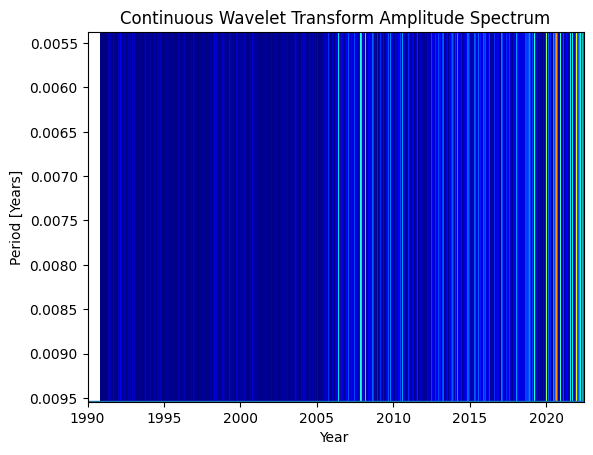

In [112]:
df=giveRollingDiff(180)
t0 = 1990; dt = 1/240
scales = np.arange(1,2)
year = t0 + np.arange(len(df))*dt
ax=scg.cws(year,df["Rolling Close Df"],scales,cmap="jet", cbar=None, ylabel="Period [Years]", xlabel="Year ",wavelet='shan')


/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = pywt.DiscreteContinuousWavelet(wavelet)
/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = pywt.DiscreteContinuousWavelet(wavelet)
/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe fo

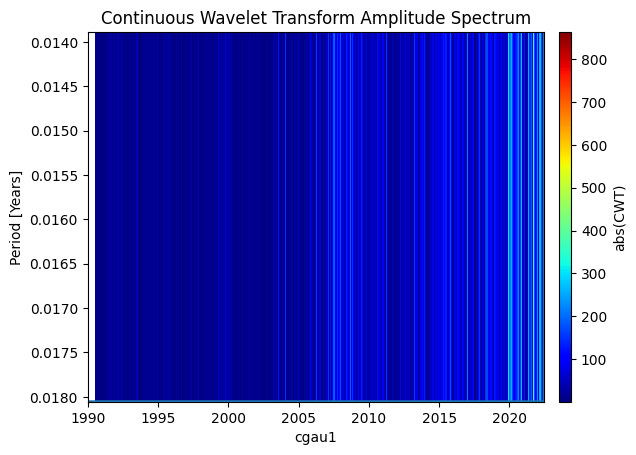

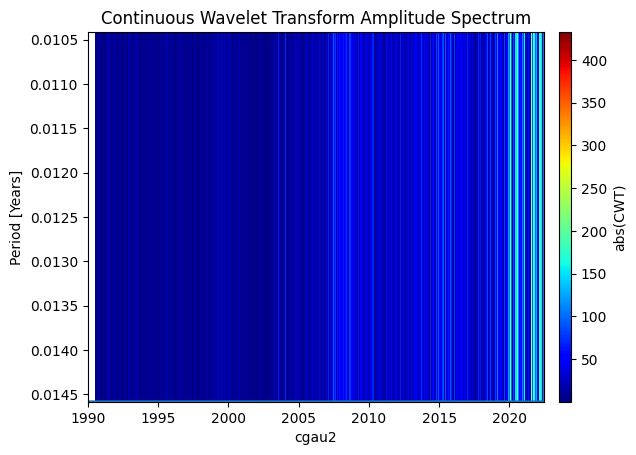

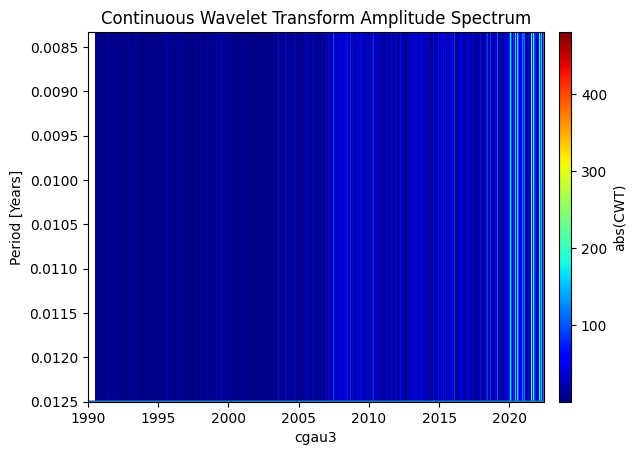

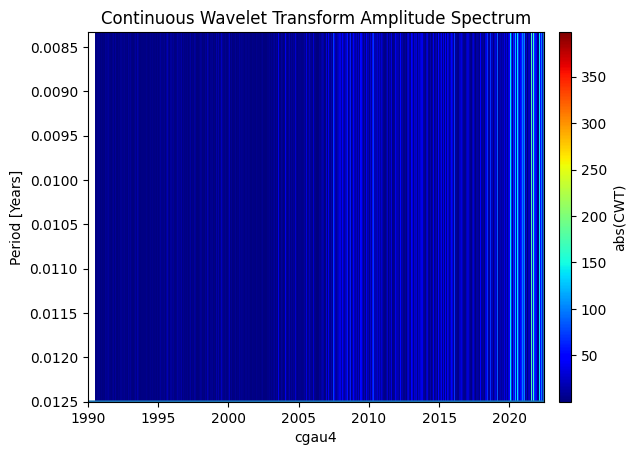

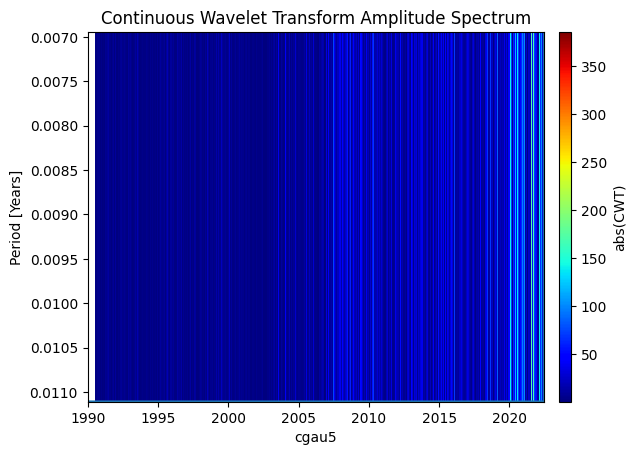

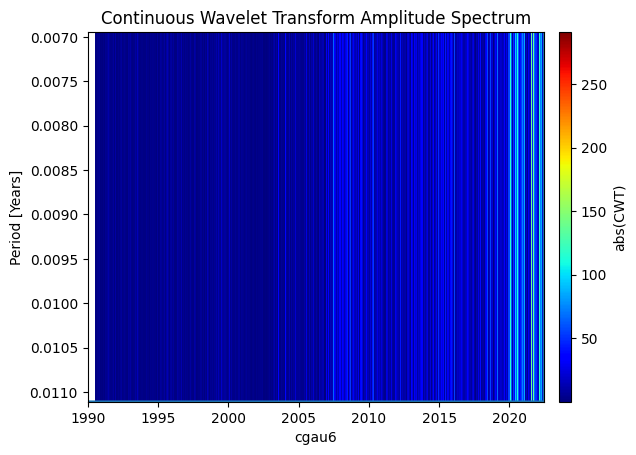

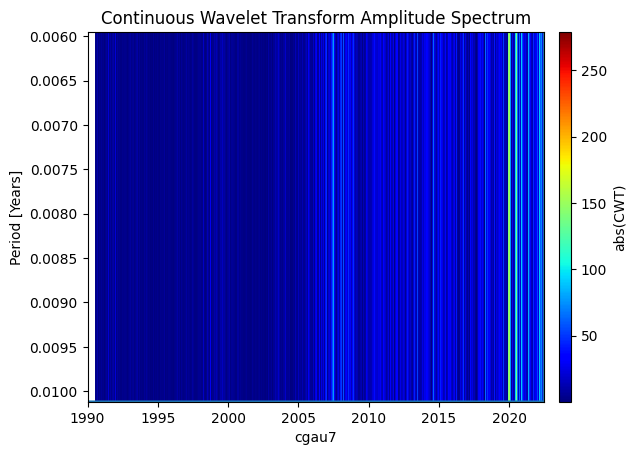

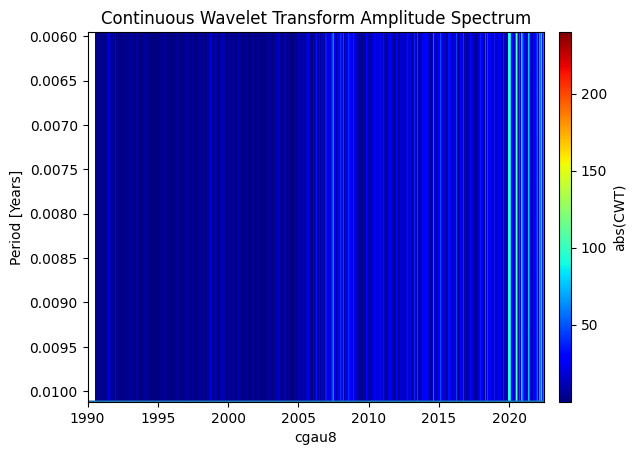

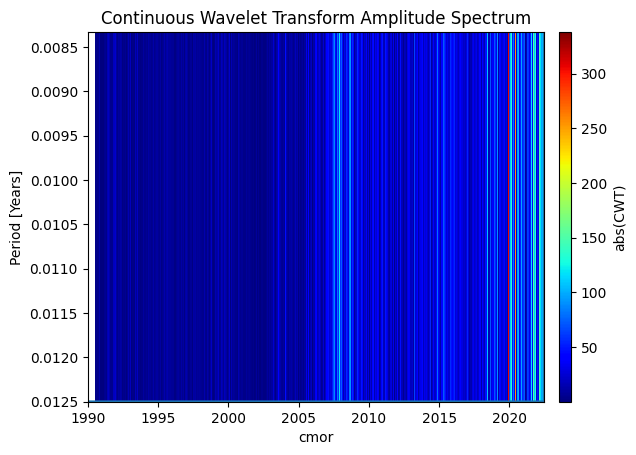

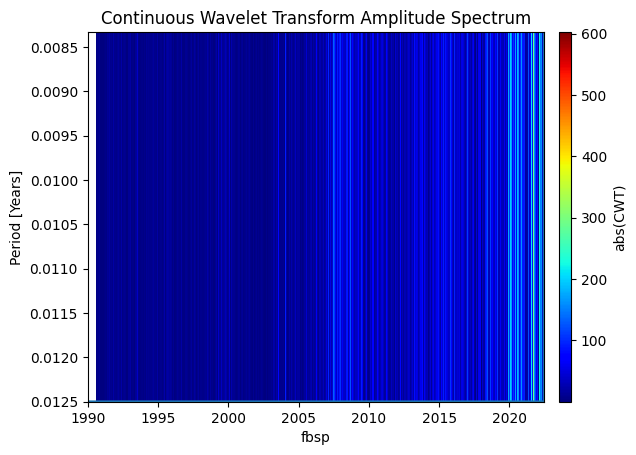

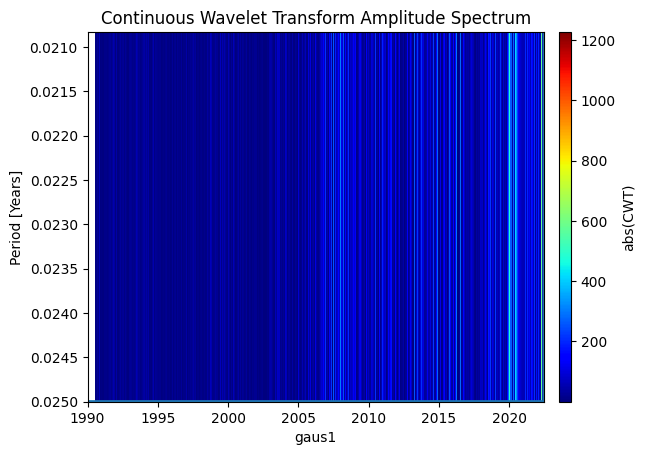

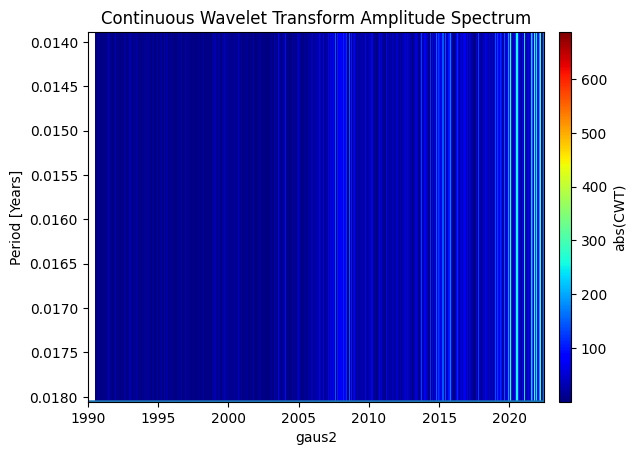

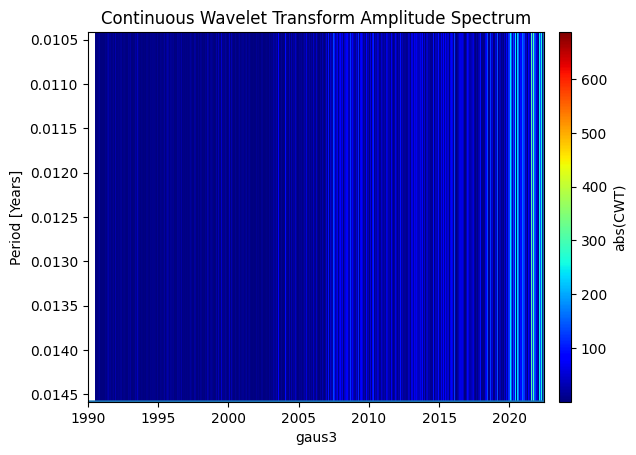

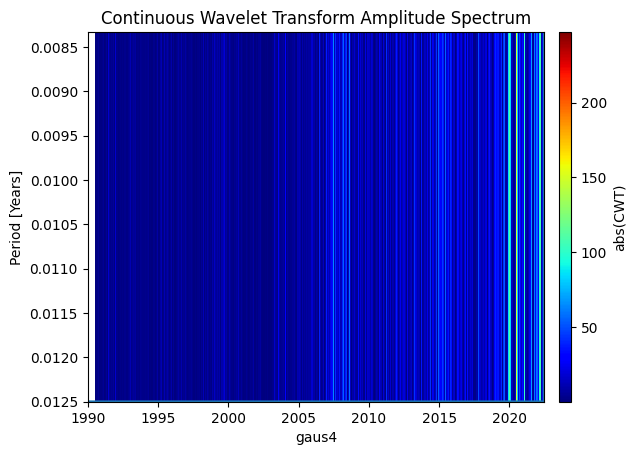

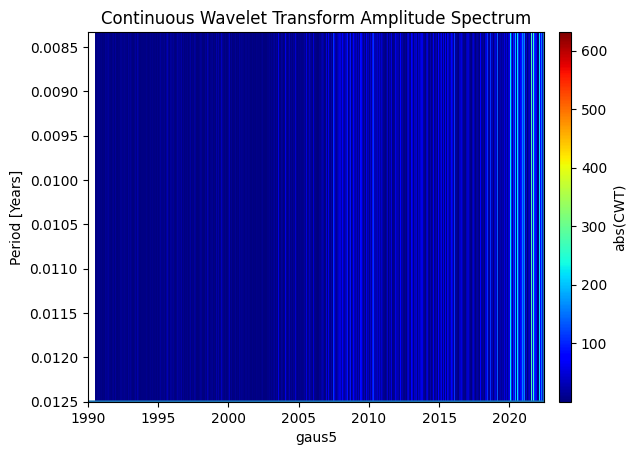

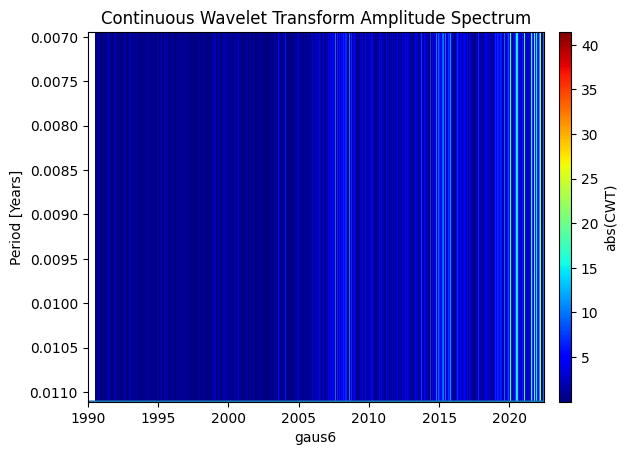

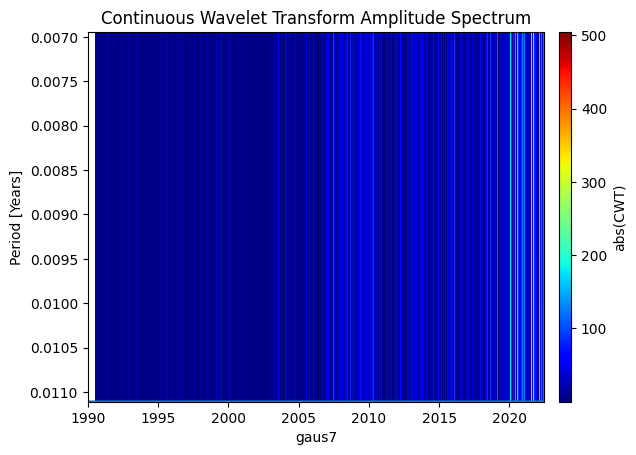

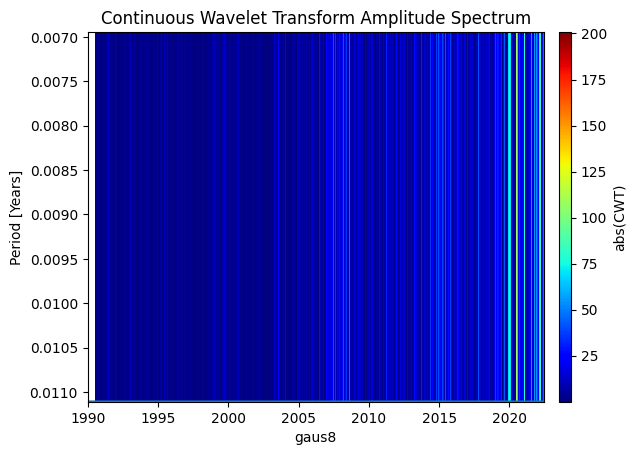

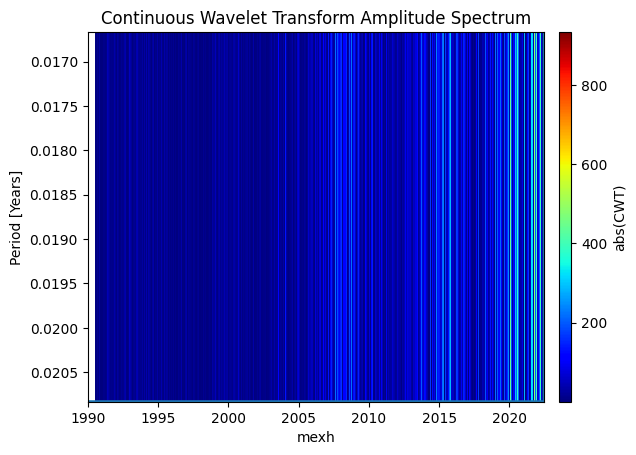

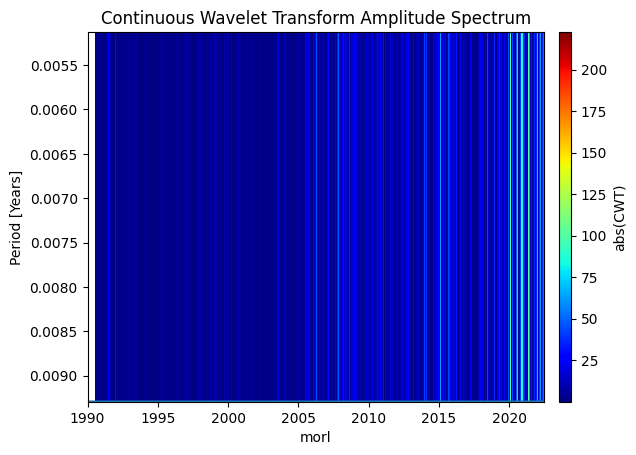

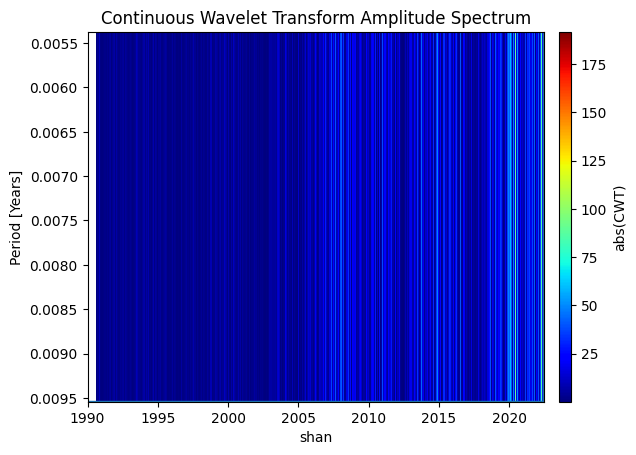

In [122]:
df=giveRollingDiff(120)
t0 = 1990; dt = 1/240
scales = np.arange(1,2)
year = t0 + np.arange(len(df))*dt


for wave in pywt.wavelist(kind='continuous'):
    scg.cws(year,df["Rolling Close Df"],scales,cmap="jet", ylabel="Period [Years]", xlabel=wave,wavelet=wave)